In [1]:
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import seaborn as sns 
import statsmodels.stats.proportion as proportion
from scipy.stats import ttest_ind,mannwhitneyu,shapiro,norm
from statsmodels.stats.weightstats import ztest
from tqdm import tqdm
import timeit
from scipy import stats
import math
from datetime import date, datetime, timedelta
import time
from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker
import warnings
warnings.filterwarnings("ignore")
import clickhouse_connect  

# Модуль 1

## Задание 2

In [4]:
data = {'Категория':[
                    'Развитие условий для досуга молодежи',
                    'Перспективы трудоустройства, карьеры',
                    'Экологические проблемы',
                    'Защита и помощь животным',
                    'Развитие образования',
                    'Борьба с наркоманией, алкоголизмом',
                    'Борьба с преступностью, безопасность',
                    'Развитие городской среды',
                    'Решение жилищных проблем',
                    'Помощь нуждающимся',
                    'Благоустройство двора',
                    'Создание условий для занятия спортом',
                    'Защита прав разных категорий населения',
                    'Решение проблем города',
                    'Патриотизм, гражданственность'
                    ],
        'Процент':[
                    37.40, 36.00, 35.80, 33.40, 32.70, 28.80, 28.50, 27.20, 23.50, 23.30, 22.90, 22.80, 22.70, 18.50, 11.60
                    ]
       }
df = pd.DataFrame(data)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Категория  15 non-null     object 
 1   Процент    15 non-null     float64
dtypes: float64(1), object(1)
memory usage: 372.0+ bytes


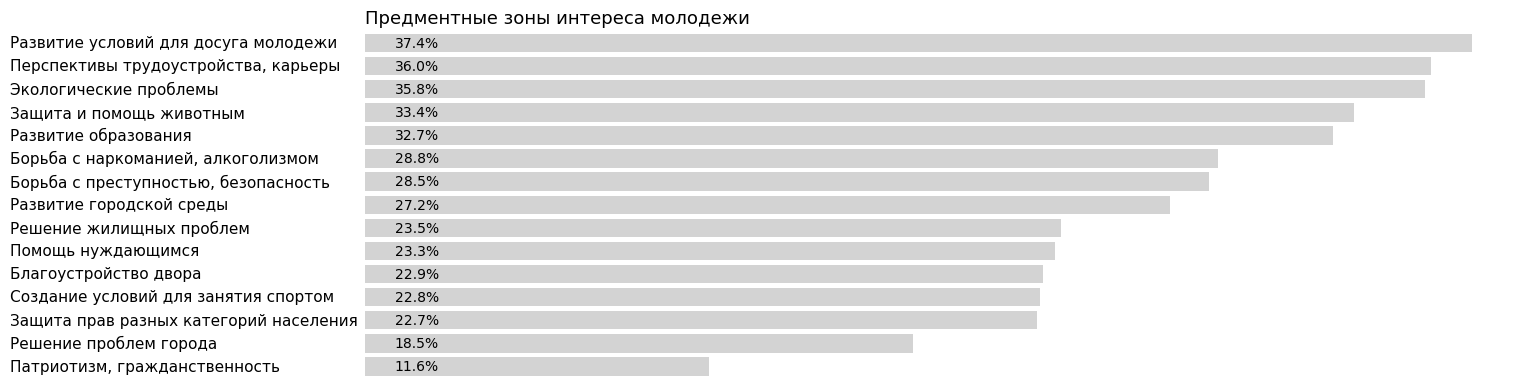

In [176]:
plt.figure(figsize=(15,4.5))
ax = sns.barplot(data=df,y='Категория',orient='h',x='Процент',color='lightgrey')
#ax.bar_label(ax.containers[0], fmt='%0.1f%%')

# Подготовка данных
#df_sorted = df.sort_values('Процент')  # сортировка для наглядности
categories = df['Категория']
values = df['Процент']

# Убираем рамки графика
for spine in ax.spines.values():
    spine.set_visible(False)

# Подписи значений — слева от начала каждого бара
for i, value in enumerate(values):
    ax.text(x=1, y=i, s=f'{value:.1f}%', va='center', ha='left', fontsize=10)  
    
# Выравниваем текст по левому краю. 
#Текст лучше выравнять по левому краю, так не будет рваного края слева и глаз будет знать, где начинается новая строка, про это тоже еще будем говорить в главе про текст
ax.set_yticks([])
for i, label in enumerate(categories):
    ax.text(x=-12, y=i, s=label, va='center', ha='left', fontsize=11)

plt.ylabel('')
plt.xlabel('')

ax.xaxis.set_visible(False)
plt.title('Предментные зоны интереса молодежи',loc='left',fontsize=13)


plt.show()

## Задание 2

In [122]:
df_2 = pd.read_csv('/Users/kemran/Downloads/2_Страховые случаи.csv')

df_2['Month, Day, Year of Filed week ended'] = pd.to_datetime(df_2['Month, Day, Year of Filed week ended'])
#df_2['Formatted Date'] = df_2['Month, Day, Year of Filed week ended'].dt.strftime('%d/%m/%y')
df_2 = df_2.sort_values(by='Month, Day, Year of Filed week ended')

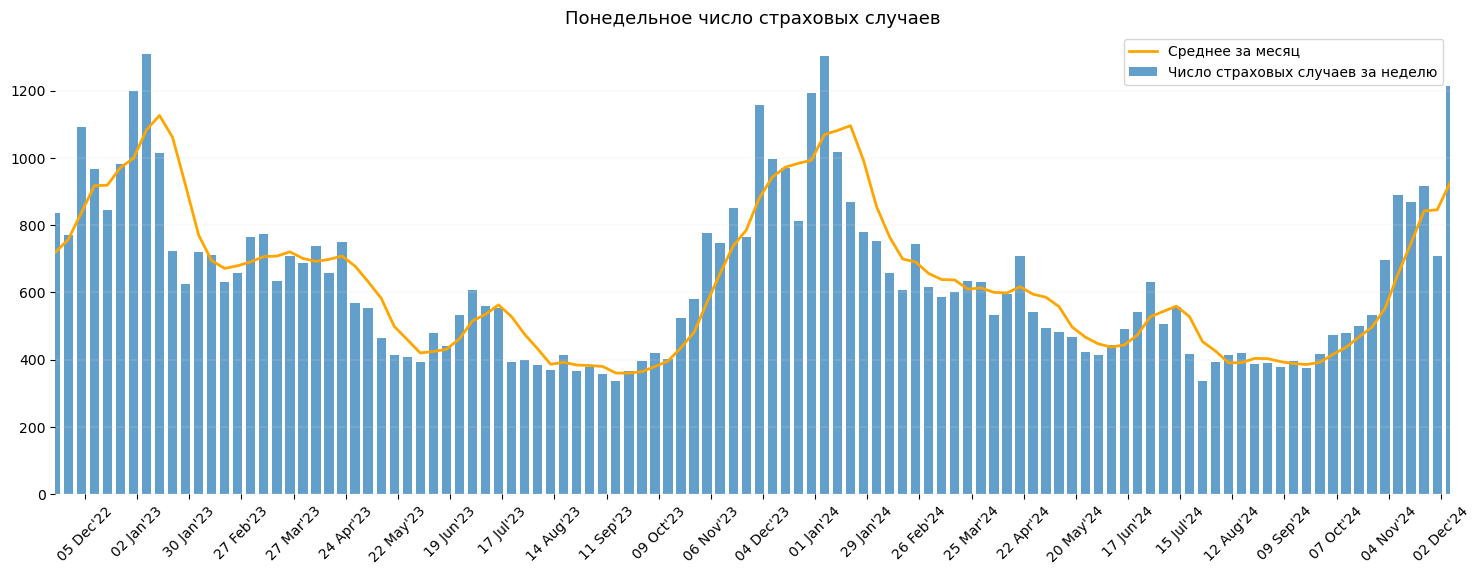

In [190]:
plt.figure(figsize=(18,6), dpi=100)
ax = plt.gca()

# Рисуем столбцы через plt.bar
ax.bar(df_2['Month, Day, Year of Filed week ended'], df_2['Initial Claims'], width=5, alpha=0.7, label='Число страховых случаев за неделю')

# Рисуем линию через sns.lineplot с datetime на оси X
sns.lineplot(data=df_2, x='Month, Day, Year of Filed week ended', y='Initial Claims 4-Week Avg', color='orange', linewidth=2, label='Среднее за месяц', ax=ax)

# Формат подписи: 23 Nov'23
custom_formatter = mdates.DateFormatter("%d %b'%y")
ax.xaxis.set_major_formatter(custom_formatter)

# Установим тики каждые 4 недели (28 дней)
locator = mdates.WeekdayLocator(interval=4, byweekday=mdates.MO)  # каждый 4-й понедельник
ax.xaxis.set_major_locator(locator)

plt.xticks(rotation=45)


# === Задаём интервал оси X от min до max даты ===
min_date = df_2['Month, Day, Year of Filed week ended'].min()
max_date = df_2['Month, Day, Year of Filed week ended'].max()
ax.set_xlim([min_date, max_date])

# Убираем рамки графика
for spine in ax.spines.values():
    spine.set_visible(False)

# Сделаем гридлайн еле заметный
ax.grid(True, which='major', axis='y', color='#dddddd', linewidth=0.2)

plt.title('Понедельное число страховых случаев',fontsize=13)
plt.xlabel('')
plt.ylabel('')
plt.legend()

plt.show()
